In [5]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold


In [7]:
from sklearn.model_selection import train_test_split

# ✨ 학습의 자동 중단 ✨
- 와인 데이터

In [12]:
from tensorflow.keras.callbacks import EarlyStopping
## 학습이 진행되어도 테스트셋 오차가 줄지 않으면 학습을 멈추게 하는 함수
from tensorflow.keras.callbacks import ModelCheckpoint

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import tensorflow as tf
import numpy
import pandas as pd

seed = 0
numpy.random.seed(seed)
tf.random.set_seed(seed)

In [65]:
df_pre = pd.read_csv('wine.csv', header = None)
df = df_pre.sample(frac = 0.15)  ## 전체 샘플 중 15%만 불러오게 함

dataset = df.values
X = dataset[:, 0:12]
Y = dataset[:, 12]

model = Sequential()
model.add(Dense(30, input_dim = 12, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])


In [66]:
# 모델 저장 폴더 만들기
import os

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'

# 모델 업데이트 및 저장
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 1,
                              save_best_only = True)

# 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 100)

# 모델 실행
history = model.fit(X, Y, validation_split = 0.33, epochs = 3500, batch_size = 500,  ## 33%는 테스트셋으로 사용
                     callbacks = [early_stopping_callback, checkpointer])

# 결과 출력 => 모델의 최종 형태를 이용하여 모델 평가
print("\n Accuracy : %.4f" % (model.evaluate(X, Y)[1]))

Epoch 1/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.8242 - accuracy: 0.7860
Epoch 00001: val_loss improved from inf to 0.52527, saving model to ./model\01-0.5253.hdf5
2/2 [==============================] - 0s 55ms/step - loss: 0.7475 - accuracy: 0.7963 - val_loss: 0.5253 - val_accuracy: 0.8230
Epoch 2/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.6060 - accuracy: 0.8120
Epoch 00002: val_loss improved from 0.52527 to 0.42333, saving model to ./model\02-0.4233.hdf5
2/2 [==============================] - 0s 12ms/step - loss: 0.5938 - accuracy: 0.8147 - val_loss: 0.4233 - val_accuracy: 0.8385
Epoch 3/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.4616 - accuracy: 0.8340
Epoch 00003: val_loss improved from 0.42333 to 0.37321, saving model to ./model\03-0.3732.hdf5
2/2 [==============================] - 0s 12ms/step - loss: 0.4782 - accuracy: 0.8270 - val_loss: 0.3732 - val_accuracy: 0.8354
Epoch 4/3500
1/2 [==============>...............] - E

Epoch 55/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.2287 - accuracy: 0.9260
Epoch 00055: val_loss did not improve from 0.18804
2/2 [==============================] - 0s 6ms/step - loss: 0.2213 - accuracy: 0.9265 - val_loss: 0.1963 - val_accuracy: 0.9224
Epoch 56/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.2352 - accuracy: 0.9200
Epoch 00056: val_loss did not improve from 0.18804
2/2 [==============================] - 0s 6ms/step - loss: 0.2229 - accuracy: 0.9204 - val_loss: 0.1928 - val_accuracy: 0.9286
Epoch 57/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.2110 - accuracy: 0.9320
Epoch 00057: val_loss improved from 0.18804 to 0.18561, saving model to ./model\57-0.1856.hdf5
2/2 [==============================] - 0s 12ms/step - loss: 0.2202 - accuracy: 0.9265 - val_loss: 0.1856 - val_accuracy: 0.9286
Epoch 58/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.2324 - accuracy: 0.9280
Epoch 00058: val_loss improved from 0.185

Epoch 83/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.2075 - accuracy: 0.9320
Epoch 00083: val_loss did not improve from 0.16562
2/2 [==============================] - 0s 7ms/step - loss: 0.2025 - accuracy: 0.9311 - val_loss: 0.1659 - val_accuracy: 0.9410
Epoch 84/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1971 - accuracy: 0.9360
Epoch 00084: val_loss did not improve from 0.16562
2/2 [==============================] - 0s 6ms/step - loss: 0.2015 - accuracy: 0.9311 - val_loss: 0.1671 - val_accuracy: 0.9410
Epoch 85/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.2207 - accuracy: 0.9240
Epoch 00085: val_loss did not improve from 0.16562
2/2 [==============================] - 0s 7ms/step - loss: 0.2010 - accuracy: 0.9296 - val_loss: 0.1669 - val_accuracy: 0.9410
Epoch 86/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1870 - accuracy: 0.9380
Epoch 00086: val_loss did not improve from 0.16562
2/2 [==============================

Epoch 111/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1890 - accuracy: 0.9380
Epoch 00111: val_loss did not improve from 0.15177
2/2 [==============================] - 0s 7ms/step - loss: 0.1851 - accuracy: 0.9342 - val_loss: 0.1518 - val_accuracy: 0.9534
Epoch 112/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1931 - accuracy: 0.9280
Epoch 00112: val_loss did not improve from 0.15177
2/2 [==============================] - 0s 6ms/step - loss: 0.1842 - accuracy: 0.9326 - val_loss: 0.1533 - val_accuracy: 0.9503
Epoch 113/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1969 - accuracy: 0.9300
Epoch 00113: val_loss did not improve from 0.15177
2/2 [==============================] - 0s 6ms/step - loss: 0.1850 - accuracy: 0.9357 - val_loss: 0.1526 - val_accuracy: 0.9503
Epoch 114/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1889 - accuracy: 0.9320
Epoch 00114: val_loss improved from 0.15177 to 0.14922, saving model to ./model\11

1/2 [==============>...............] - ETA: 0s - loss: 0.1461 - accuracy: 0.9380
Epoch 00165: val_loss did not improve from 0.12681
2/2 [==============================] - 0s 6ms/step - loss: 0.1568 - accuracy: 0.9357 - val_loss: 0.1291 - val_accuracy: 0.9472
Epoch 166/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1702 - accuracy: 0.9320
Epoch 00166: val_loss did not improve from 0.12681
2/2 [==============================] - 0s 6ms/step - loss: 0.1581 - accuracy: 0.9357 - val_loss: 0.1290 - val_accuracy: 0.9472
Epoch 167/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1594 - accuracy: 0.9340
Epoch 00167: val_loss improved from 0.12681 to 0.12511, saving model to ./model\167-0.1251.hdf5
2/2 [==============================] - 0s 12ms/step - loss: 0.1572 - accuracy: 0.9342 - val_loss: 0.1251 - val_accuracy: 0.9565
Epoch 168/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1737 - accuracy: 0.9300
Epoch 00168: val_loss did not improve from 0.12511


Epoch 193/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1433 - accuracy: 0.9480
Epoch 00193: val_loss improved from 0.11473 to 0.11402, saving model to ./model\193-0.1140.hdf5
2/2 [==============================] - 0s 12ms/step - loss: 0.1496 - accuracy: 0.9403 - val_loss: 0.1140 - val_accuracy: 0.9534
Epoch 194/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1407 - accuracy: 0.9400
Epoch 00194: val_loss did not improve from 0.11402
2/2 [==============================] - 0s 6ms/step - loss: 0.1445 - accuracy: 0.9418 - val_loss: 0.1183 - val_accuracy: 0.9596
Epoch 195/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1563 - accuracy: 0.9400
Epoch 00195: val_loss did not improve from 0.11402
2/2 [==============================] - 0s 6ms/step - loss: 0.1479 - accuracy: 0.9464 - val_loss: 0.1165 - val_accuracy: 0.9596
Epoch 196/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1418 - accuracy: 0.9440
Epoch 00196: val_loss improved from 

Epoch 221/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1447 - accuracy: 0.9480
Epoch 00221: val_loss did not improve from 0.10623
2/2 [==============================] - 0s 7ms/step - loss: 0.1408 - accuracy: 0.9495 - val_loss: 0.1083 - val_accuracy: 0.9658
Epoch 222/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1198 - accuracy: 0.9640
Epoch 00222: val_loss did not improve from 0.10623
2/2 [==============================] - 0s 7ms/step - loss: 0.1339 - accuracy: 0.9495 - val_loss: 0.1078 - val_accuracy: 0.9534
Epoch 223/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1383 - accuracy: 0.9420
Epoch 00223: val_loss did not improve from 0.10623
2/2 [==============================] - 0s 7ms/step - loss: 0.1400 - accuracy: 0.9418 - val_loss: 0.1080 - val_accuracy: 0.9534
Epoch 224/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1455 - accuracy: 0.9400
Epoch 00224: val_loss improved from 0.10623 to 0.10526, saving model to ./model\22

Epoch 249/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1192 - accuracy: 0.9600
Epoch 00249: val_loss did not improve from 0.09876
2/2 [==============================] - 0s 6ms/step - loss: 0.1257 - accuracy: 0.9571 - val_loss: 0.1103 - val_accuracy: 0.9658
Epoch 250/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1287 - accuracy: 0.9600
Epoch 00250: val_loss did not improve from 0.09876
2/2 [==============================] - 0s 8ms/step - loss: 0.1324 - accuracy: 0.9541 - val_loss: 0.0995 - val_accuracy: 0.9658
Epoch 251/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1289 - accuracy: 0.9540
Epoch 00251: val_loss did not improve from 0.09876
2/2 [==============================] - 0s 7ms/step - loss: 0.1251 - accuracy: 0.9571 - val_loss: 0.0997 - val_accuracy: 0.9534
Epoch 252/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1465 - accuracy: 0.9400
Epoch 00252: val_loss improved from 0.09876 to 0.09845, saving model to ./model\25

Epoch 278/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1080 - accuracy: 0.9620
Epoch 00278: val_loss did not improve from 0.09128
2/2 [==============================] - 0s 6ms/step - loss: 0.1174 - accuracy: 0.9587 - val_loss: 0.0919 - val_accuracy: 0.9720
Epoch 279/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1149 - accuracy: 0.9600
Epoch 00279: val_loss improved from 0.09128 to 0.09078, saving model to ./model\279-0.0908.hdf5
2/2 [==============================] - 0s 12ms/step - loss: 0.1157 - accuracy: 0.9617 - val_loss: 0.0908 - val_accuracy: 0.9658
Epoch 280/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1091 - accuracy: 0.9580
Epoch 00280: val_loss did not improve from 0.09078
2/2 [==============================] - 0s 6ms/step - loss: 0.1162 - accuracy: 0.9541 - val_loss: 0.0910 - val_accuracy: 0.9658
Epoch 281/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1086 - accuracy: 0.9580
Epoch 00281: val_loss did not improv

1/2 [==============>...............] - ETA: 0s - loss: 0.1023 - accuracy: 0.9700
Epoch 00334: val_loss did not improve from 0.07853
2/2 [==============================] - 0s 7ms/step - loss: 0.1024 - accuracy: 0.9694 - val_loss: 0.0795 - val_accuracy: 0.9720
Epoch 335/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0931 - accuracy: 0.9720
Epoch 00335: val_loss did not improve from 0.07853
2/2 [==============================] - 0s 7ms/step - loss: 0.1023 - accuracy: 0.9678 - val_loss: 0.0805 - val_accuracy: 0.9720
Epoch 336/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0841 - accuracy: 0.9700
Epoch 00336: val_loss did not improve from 0.07853
2/2 [==============================] - 0s 7ms/step - loss: 0.1009 - accuracy: 0.9678 - val_loss: 0.0845 - val_accuracy: 0.9752
Epoch 337/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0981 - accuracy: 0.9720
Epoch 00337: val_loss did not improve from 0.07853
2/2 [==============================] - 0s 7ms/

Epoch 363/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0969 - accuracy: 0.9600
Epoch 00363: val_loss did not improve from 0.07293
2/2 [==============================] - 0s 7ms/step - loss: 0.0958 - accuracy: 0.9648 - val_loss: 0.0745 - val_accuracy: 0.9783
Epoch 364/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0810 - accuracy: 0.9780
Epoch 00364: val_loss did not improve from 0.07293
2/2 [==============================] - 0s 7ms/step - loss: 0.0921 - accuracy: 0.9709 - val_loss: 0.0839 - val_accuracy: 0.9814
Epoch 365/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0951 - accuracy: 0.9660
Epoch 00365: val_loss improved from 0.07293 to 0.07274, saving model to ./model\365-0.0727.hdf5
2/2 [==============================] - 0s 13ms/step - loss: 0.0979 - accuracy: 0.9663 - val_loss: 0.0727 - val_accuracy: 0.9752
Epoch 366/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0887 - accuracy: 0.9760
Epoch 00366: val_loss did not improv

Epoch 392/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0842 - accuracy: 0.9720
Epoch 00392: val_loss did not improve from 0.06893
2/2 [==============================] - 0s 6ms/step - loss: 0.0855 - accuracy: 0.9709 - val_loss: 0.0693 - val_accuracy: 0.9752
Epoch 393/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0814 - accuracy: 0.9740
Epoch 00393: val_loss did not improve from 0.06893
2/2 [==============================] - 0s 7ms/step - loss: 0.0858 - accuracy: 0.9709 - val_loss: 0.0715 - val_accuracy: 0.9845
Epoch 394/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0911 - accuracy: 0.9680
Epoch 00394: val_loss did not improve from 0.06893
2/2 [==============================] - 0s 6ms/step - loss: 0.0869 - accuracy: 0.9694 - val_loss: 0.0697 - val_accuracy: 0.9845
Epoch 395/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0848 - accuracy: 0.9700
Epoch 00395: val_loss improved from 0.06893 to 0.06690, saving model to ./model\39

Epoch 421/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0850 - accuracy: 0.9680
Epoch 00421: val_loss did not improve from 0.05910
2/2 [==============================] - 0s 6ms/step - loss: 0.0879 - accuracy: 0.9678 - val_loss: 0.0615 - val_accuracy: 0.9845
Epoch 422/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0672 - accuracy: 0.9760
Epoch 00422: val_loss did not improve from 0.05910
2/2 [==============================] - 0s 7ms/step - loss: 0.0802 - accuracy: 0.9663 - val_loss: 0.0643 - val_accuracy: 0.9752
Epoch 423/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0697 - accuracy: 0.9700
Epoch 00423: val_loss did not improve from 0.05910
2/2 [==============================] - 0s 7ms/step - loss: 0.0868 - accuracy: 0.9632 - val_loss: 0.0626 - val_accuracy: 0.9845
Epoch 424/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0781 - accuracy: 0.9680
Epoch 00424: val_loss did not improve from 0.05910
2/2 [==========================

Epoch 451/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0638 - accuracy: 0.9740
Epoch 00451: val_loss did not improve from 0.05691
2/2 [==============================] - 0s 8ms/step - loss: 0.0704 - accuracy: 0.9740 - val_loss: 0.0595 - val_accuracy: 0.9876
Epoch 452/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0633 - accuracy: 0.9800
Epoch 00452: val_loss did not improve from 0.05691
2/2 [==============================] - 0s 7ms/step - loss: 0.0702 - accuracy: 0.9724 - val_loss: 0.0585 - val_accuracy: 0.9876
Epoch 453/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0762 - accuracy: 0.9680
Epoch 00453: val_loss did not improve from 0.05691
2/2 [==============================] - 0s 7ms/step - loss: 0.0703 - accuracy: 0.9724 - val_loss: 0.0578 - val_accuracy: 0.9845
Epoch 454/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0686 - accuracy: 0.9700
Epoch 00454: val_loss did not improve from 0.05691
2/2 [==========================

Epoch 481/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0760 - accuracy: 0.9740
Epoch 00481: val_loss did not improve from 0.05435
2/2 [==============================] - 0s 7ms/step - loss: 0.0682 - accuracy: 0.9740 - val_loss: 0.0620 - val_accuracy: 0.9876
Epoch 482/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0609 - accuracy: 0.9780
Epoch 00482: val_loss did not improve from 0.05435
2/2 [==============================] - 0s 7ms/step - loss: 0.0703 - accuracy: 0.9709 - val_loss: 0.0603 - val_accuracy: 0.9876
Epoch 483/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0610 - accuracy: 0.9780
Epoch 00483: val_loss did not improve from 0.05435
2/2 [==============================] - 0s 7ms/step - loss: 0.0685 - accuracy: 0.9770 - val_loss: 0.0551 - val_accuracy: 0.9814
Epoch 484/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0694 - accuracy: 0.9720
Epoch 00484: val_loss did not improve from 0.05435
2/2 [==========================

Epoch 511/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0629 - accuracy: 0.9820
Epoch 00511: val_loss did not improve from 0.05435
2/2 [==============================] - 0s 7ms/step - loss: 0.0685 - accuracy: 0.9740 - val_loss: 0.0562 - val_accuracy: 0.9876
Epoch 512/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0715 - accuracy: 0.9700
Epoch 00512: val_loss did not improve from 0.05435
2/2 [==============================] - 0s 7ms/step - loss: 0.0637 - accuracy: 0.9740 - val_loss: 0.0561 - val_accuracy: 0.9845
Epoch 513/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0686 - accuracy: 0.9740
Epoch 00513: val_loss did not improve from 0.05435
2/2 [==============================] - 0s 7ms/step - loss: 0.0666 - accuracy: 0.9740 - val_loss: 0.0586 - val_accuracy: 0.9876
Epoch 514/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0590 - accuracy: 0.9740
Epoch 00514: val_loss did not improve from 0.05435
2/2 [==========================

Epoch 541/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0708 - accuracy: 0.9700
Epoch 00541: val_loss did not improve from 0.05413
2/2 [==============================] - 0s 6ms/step - loss: 0.0625 - accuracy: 0.9755 - val_loss: 0.0550 - val_accuracy: 0.9876
Epoch 542/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0710 - accuracy: 0.9700
Epoch 00542: val_loss did not improve from 0.05413
2/2 [==============================] - 0s 7ms/step - loss: 0.0588 - accuracy: 0.9755 - val_loss: 0.0552 - val_accuracy: 0.9845
Epoch 543/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0638 - accuracy: 0.9780
Epoch 00543: val_loss did not improve from 0.05413
2/2 [==============================] - 0s 6ms/step - loss: 0.0650 - accuracy: 0.9770 - val_loss: 0.0549 - val_accuracy: 0.9876
Epoch 544/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0596 - accuracy: 0.9780
Epoch 00544: val_loss did not improve from 0.05413
2/2 [==========================

Epoch 571/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0630 - accuracy: 0.9760
Epoch 00571: val_loss did not improve from 0.05244
2/2 [==============================] - 0s 7ms/step - loss: 0.0569 - accuracy: 0.9740 - val_loss: 0.0533 - val_accuracy: 0.9876
Epoch 572/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0493 - accuracy: 0.9780
Epoch 00572: val_loss did not improve from 0.05244
2/2 [==============================] - 0s 7ms/step - loss: 0.0592 - accuracy: 0.9770 - val_loss: 0.0529 - val_accuracy: 0.9876
Epoch 573/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0617 - accuracy: 0.9780
Epoch 00573: val_loss did not improve from 0.05244
2/2 [==============================] - 0s 7ms/step - loss: 0.0566 - accuracy: 0.9786 - val_loss: 0.0639 - val_accuracy: 0.9814
Epoch 574/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0527 - accuracy: 0.9760
Epoch 00574: val_loss did not improve from 0.05244
2/2 [==========================

Epoch 601/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0466 - accuracy: 0.9820
Epoch 00601: val_loss did not improve from 0.05191
2/2 [==============================] - 0s 7ms/step - loss: 0.0525 - accuracy: 0.9816 - val_loss: 0.0799 - val_accuracy: 0.9814
Epoch 602/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0649 - accuracy: 0.9760
Epoch 00602: val_loss did not improve from 0.05191
2/2 [==============================] - 0s 6ms/step - loss: 0.0665 - accuracy: 0.9740 - val_loss: 0.0526 - val_accuracy: 0.9876
Epoch 603/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0482 - accuracy: 0.9800
Epoch 00603: val_loss did not improve from 0.05191
2/2 [==============================] - 0s 7ms/step - loss: 0.0574 - accuracy: 0.9770 - val_loss: 0.0539 - val_accuracy: 0.9876
Epoch 604/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0668 - accuracy: 0.9800
Epoch 00604: val_loss did not improve from 0.05191
2/2 [==========================

Epoch 631/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0501 - accuracy: 0.9860
Epoch 00631: val_loss did not improve from 0.05191
2/2 [==============================] - 0s 7ms/step - loss: 0.0512 - accuracy: 0.9847 - val_loss: 0.0540 - val_accuracy: 0.9876
Epoch 632/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0569 - accuracy: 0.9840
Epoch 00632: val_loss did not improve from 0.05191
2/2 [==============================] - 0s 7ms/step - loss: 0.0507 - accuracy: 0.9862 - val_loss: 0.0580 - val_accuracy: 0.9876
Epoch 633/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0551 - accuracy: 0.9840
Epoch 00633: val_loss did not improve from 0.05191
2/2 [==============================] - 0s 7ms/step - loss: 0.0513 - accuracy: 0.9847 - val_loss: 0.0539 - val_accuracy: 0.9876
Epoch 634/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0490 - accuracy: 0.9860
Epoch 00634: val_loss did not improve from 0.05191
2/2 [==========================

Epoch 661/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0578 - accuracy: 0.9840
Epoch 00661: val_loss did not improve from 0.05123
2/2 [==============================] - 0s 7ms/step - loss: 0.0503 - accuracy: 0.9877 - val_loss: 0.0626 - val_accuracy: 0.9876
Epoch 662/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0557 - accuracy: 0.9780
Epoch 00662: val_loss did not improve from 0.05123
2/2 [==============================] - 0s 7ms/step - loss: 0.0515 - accuracy: 0.9816 - val_loss: 0.0592 - val_accuracy: 0.9876
Epoch 663/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0470 - accuracy: 0.9920
Epoch 00663: val_loss did not improve from 0.05123
2/2 [==============================] - 0s 7ms/step - loss: 0.0477 - accuracy: 0.9877 - val_loss: 0.0536 - val_accuracy: 0.9876
Epoch 664/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0630 - accuracy: 0.9820
Epoch 00664: val_loss did not improve from 0.05123
2/2 [==========================

Epoch 691/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0369 - accuracy: 0.9860
Epoch 00691: val_loss did not improve from 0.05123
2/2 [==============================] - 0s 7ms/step - loss: 0.0481 - accuracy: 0.9816 - val_loss: 0.0569 - val_accuracy: 0.9907
Epoch 692/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0483 - accuracy: 0.9860
Epoch 00692: val_loss did not improve from 0.05123
2/2 [==============================] - 0s 7ms/step - loss: 0.0471 - accuracy: 0.9847 - val_loss: 0.0550 - val_accuracy: 0.9876
Epoch 693/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0536 - accuracy: 0.9820
Epoch 00693: val_loss did not improve from 0.05123
2/2 [==============================] - 0s 6ms/step - loss: 0.0458 - accuracy: 0.9862 - val_loss: 0.0564 - val_accuracy: 0.9907
Epoch 694/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0502 - accuracy: 0.9840
Epoch 00694: val_loss did not improve from 0.05123
2/2 [==========================

Epoch 721/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0419 - accuracy: 0.9840
Epoch 00721: val_loss did not improve from 0.05123
2/2 [==============================] - 0s 7ms/step - loss: 0.0471 - accuracy: 0.9801 - val_loss: 0.0574 - val_accuracy: 0.9907
Epoch 722/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0365 - accuracy: 0.9920
Epoch 00722: val_loss did not improve from 0.05123
2/2 [==============================] - 0s 7ms/step - loss: 0.0429 - accuracy: 0.9862 - val_loss: 0.0528 - val_accuracy: 0.9876
Epoch 723/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0479 - accuracy: 0.9880
Epoch 00723: val_loss did not improve from 0.05123
2/2 [==============================] - 0s 7ms/step - loss: 0.0480 - accuracy: 0.9877 - val_loss: 0.0532 - val_accuracy: 0.9876
Epoch 724/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0529 - accuracy: 0.9860
Epoch 00724: val_loss did not improve from 0.05123
2/2 [==========================

31/31 [==============================] - 0s 615us/step - loss: 0.0486 - accuracy: 0.9856

 Accuracy : 0.9856


# ✨ 오차 및 정확도 그래프 그리기 ✨
- 와인 데이터

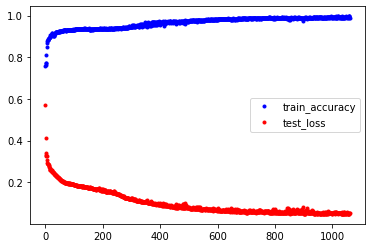

In [41]:
# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss = history.history['val_loss']

# y_acc에 학습셋으로 측정한 정확도의 값을 저장
y_acc = history.history['accuracy']

# x값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = numpy.arange(len(y_acc))
plt.plot(x_len, y_acc, "o", c = 'blue', markersize = 3, label = 'train_accuracy')
plt.plot(x_len, y_vloss, "o", c = 'red', markersize = 3, label = 'test_loss')
plt.legend()

plt.show()

# => 오차는 떨어지고 정확도는 올라감 => 학습이 잘되었다는 것
# => 어느 순간 학습셋 정확도가 계속 올라가는데, 테스트셋 오차가 다시 올라가면 => 과적합이 일어났다는 증거 

# ✨ 선형 회귀 적용하기 ✨
- 보스턴 집값 데이터

🐶 주어진 환경 요인과 집값의 변동을 학습해서 환경 요인만 놓고 집값을 예측하는 것      
🦊 지금까지는 모델을 쌓을 때 마지막에 sigmoid (0, 1) -> 이제는 relu (연속된 값)

In [34]:
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(seed)

# df = pd.read_csv('housing2.csv')   ## 엑셀로 직접 나눈 데이터
df = pd.read_csv('housing.csv', delim_whitespace = True, header = None)   ##화이트공간(빈공간)으로 나누어졌다라는 뜻

dataset = df.values
X = dataset[:, 0:13]
Y = dataset[:, 13]    # 가격 (단위 : $1.000)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3,
                                                   random_state = seed)

model = Sequential()
model.add(Dense(30, input_dim = 13, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(1))

model.compile(loss = 'mean_squared_error',    #손실함수 : 최소 제곱법 -> 선형 회귀이기 때문에
             optimizer = 'adam')
         ## metrics = ['accuracy'] : 안 쓰는 이유 = 선형 회귀는 이진분류처럼 예측값과 실제값의 같다 다르다 계산 불가능하기 때문
    
model.fit(X_train, Y_train, epochs = 200, batch_size = 10)

Y_prediction = model.predict(X_test).flatten()

for i in range(10):
    label = Y_test[i]
    prediction = Y_prediction[i]
    print("실제 가격 : {:.3f}, 예상 가격 : {:.3f}" .format(label, prediction))

Epoch 1/200
51/51 [==============================] - 0s 616us/step - loss: 6179.0347
Epoch 2/200
51/51 [==============================] - 0s 586us/step - loss: 527.4108
Epoch 3/200
51/51 [==============================] - 0s 635us/step - loss: 355.2221
Epoch 4/200
51/51 [==============================] - 0s 625us/step - loss: 196.1154
Epoch 5/200
51/51 [==============================] - 0s 643us/step - loss: 132.4047
Epoch 6/200
51/51 [==============================] - 0s 617us/step - loss: 91.6433
Epoch 7/200
51/51 [==============================] - 0s 673us/step - loss: 79.8189
Epoch 8/200
51/51 [==============================] - 0s 664us/step - loss: 73.8476
Epoch 9/200
51/51 [==============================] - 0s 656us/step - loss: 69.4761
Epoch 10/200
51/51 [==============================] - 0s 618us/step - loss: 68.2942
Epoch 11/200
51/51 [==============================] - 0s 606us/step - loss: 66.6846
Epoch 12/200
51/51 [==============================] - 0s 621us/step - loss: 64.

51/51 [==============================] - 0s 549us/step - loss: 27.1582
Epoch 99/200
51/51 [==============================] - 0s 554us/step - loss: 26.1818
Epoch 100/200
51/51 [==============================] - 0s 519us/step - loss: 24.5368
Epoch 101/200
51/51 [==============================] - 0s 557us/step - loss: 24.5186
Epoch 102/200
51/51 [==============================] - 0s 587us/step - loss: 26.1143
Epoch 103/200
51/51 [==============================] - 0s 549us/step - loss: 24.8473
Epoch 104/200
51/51 [==============================] - 0s 579us/step - loss: 24.7569
Epoch 105/200
51/51 [==============================] - 0s 547us/step - loss: 23.8286
Epoch 106/200
51/51 [==============================] - 0s 539us/step - loss: 24.1230
Epoch 107/200
51/51 [==============================] - 0s 543us/step - loss: 28.0019
Epoch 108/200
51/51 [==============================] - 0s 438us/step - loss: 24.8288
Epoch 109/200
51/51 [==============================] - 0s 440us/step - loss: 25.

51/51 [==============================] - 0s 541us/step - loss: 18.9450
Epoch 195/200
51/51 [==============================] - 0s 523us/step - loss: 17.2929
Epoch 196/200
51/51 [==============================] - 0s 565us/step - loss: 19.1072
Epoch 197/200
51/51 [==============================] - 0s 570us/step - loss: 17.7384
Epoch 198/200
51/51 [==============================] - 0s 587us/step - loss: 17.5169
Epoch 199/200
51/51 [==============================] - 0s 591us/step - loss: 17.8385
Epoch 200/200
51/51 [==============================] - 0s 642us/step - loss: 16.5491
실제 가격 : 22.600, 예상 가격 : 19.257
실제 가격 : 50.000, 예상 가격 : 25.890
실제 가격 : 23.000, 예상 가격 : 21.569
실제 가격 : 8.300, 예상 가격 : 11.177
실제 가격 : 21.200, 예상 가격 : 19.183
실제 가격 : 19.900, 예상 가격 : 21.620
실제 가격 : 20.600, 예상 가격 : 16.241
실제 가격 : 18.700, 예상 가격 : 22.841
실제 가격 : 16.100, 예상 가격 : 17.481
실제 가격 : 18.600, 예상 가격 : 13.820


# ✨ 피마 인디언 당뇨병 데이터 ✨

In [49]:
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(seed)

# df = pd.read_csv('housing2.csv')   ## 엑셀로 직접 나눈 데이터
df = pd.read_csv('pima-indians-diabetes.csv', delimiter = ',', dtype = np.float32)
dataset = df.values
X = dataset[:, 0:8]
Y = dataset[:, 8]    # 가격 (단위 : $1.000)

#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3,
#                                                   random_state = seed)

X_train = dataset[:700, 0:8]
Y_train = dataset[:700, 8]
X_test = dataset[700:, 0:8]
Y_test = dataset[700:, 8]   
    
model = Sequential()
model.add(Dense(12, input_dim = 8, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',    #손실함수 : 최소 제곱법 -> 선형 회귀이기 때문에
             optimizer = 'adam',
             metrics = ['accuracy'])

# 모델 저장 폴더 만들기
import os

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'

# 모델 업데이트 및 저장
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 1,
                              save_best_only = True)

# 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 100)


history = model.fit(X_train, Y_train, epochs = 1500, batch_size = 64)

# 모델 평가하기
scores = model.evaluate(X_test, Y_test) 
print("%s : %.2f%%" %(model.metrics_names[1], scores[1] * 100))

Epoch 1/1500
11/11 [==============================] - 0s 635us/step - loss: 10.3692 - accuracy: 0.6257
Epoch 2/1500
11/11 [==============================] - 0s 806us/step - loss: 8.5059 - accuracy: 0.6271
Epoch 3/1500
11/11 [==============================] - 0s 626us/step - loss: 6.7811 - accuracy: 0.6314
Epoch 4/1500
11/11 [==============================] - 0s 629us/step - loss: 5.1179 - accuracy: 0.6414
Epoch 5/1500
11/11 [==============================] - 0s 544us/step - loss: 3.7199 - accuracy: 0.6500
Epoch 6/1500
11/11 [==============================] - 0s 635us/step - loss: 2.6774 - accuracy: 0.6614
Epoch 7/1500
11/11 [==============================] - 0s 635us/step - loss: 2.0324 - accuracy: 0.6543
Epoch 8/1500
11/11 [==============================] - 0s 636us/step - loss: 1.7675 - accuracy: 0.6471
Epoch 9/1500
11/11 [==============================] - 0s 648us/step - loss: 1.5712 - accuracy: 0.6314
Epoch 10/1500
11/11 [==============================] - 0s 730us/step - loss: 1.42

11/11 [==============================] - 0s 641us/step - loss: 0.5907 - accuracy: 0.7029
Epoch 81/1500
11/11 [==============================] - 0s 544us/step - loss: 0.5962 - accuracy: 0.7043
Epoch 82/1500
11/11 [==============================] - 0s 591us/step - loss: 0.5915 - accuracy: 0.7057
Epoch 83/1500
11/11 [==============================] - 0s 633us/step - loss: 0.5906 - accuracy: 0.7043
Epoch 84/1500
11/11 [==============================] - 0s 747us/step - loss: 0.5875 - accuracy: 0.7014
Epoch 85/1500
11/11 [==============================] - 0s 721us/step - loss: 0.5855 - accuracy: 0.7071
Epoch 86/1500
11/11 [==============================] - 0s 534us/step - loss: 0.5851 - accuracy: 0.7114
Epoch 87/1500
11/11 [==============================] - 0s 725us/step - loss: 0.5832 - accuracy: 0.7171
Epoch 88/1500
11/11 [==============================] - 0s 538us/step - loss: 0.5827 - accuracy: 0.7086
Epoch 89/1500
11/11 [==============================] - 0s 629us/step - loss: 0.5831 - a

11/11 [==============================] - 0s 544us/step - loss: 0.5448 - accuracy: 0.7086
Epoch 160/1500
11/11 [==============================] - 0s 601us/step - loss: 0.5432 - accuracy: 0.7143
Epoch 161/1500
11/11 [==============================] - 0s 544us/step - loss: 0.5478 - accuracy: 0.7157
Epoch 162/1500
11/11 [==============================] - 0s 655us/step - loss: 0.5458 - accuracy: 0.7114
Epoch 163/1500
11/11 [==============================] - 0s 723us/step - loss: 0.5435 - accuracy: 0.7186
Epoch 164/1500
11/11 [==============================] - 0s 664us/step - loss: 0.5460 - accuracy: 0.7186
Epoch 165/1500
11/11 [==============================] - 0s 714us/step - loss: 0.5448 - accuracy: 0.7129
Epoch 166/1500
11/11 [==============================] - 0s 629us/step - loss: 0.5457 - accuracy: 0.7157
Epoch 167/1500
11/11 [==============================] - 0s 639us/step - loss: 0.5422 - accuracy: 0.7114
Epoch 168/1500
11/11 [==============================] - 0s 595us/step - loss: 0

11/11 [==============================] - 0s 630us/step - loss: 0.5328 - accuracy: 0.7186
Epoch 238/1500
11/11 [==============================] - 0s 544us/step - loss: 0.5324 - accuracy: 0.7286
Epoch 239/1500
11/11 [==============================] - 0s 640us/step - loss: 0.5282 - accuracy: 0.7229
Epoch 240/1500
11/11 [==============================] - 0s 634us/step - loss: 0.5318 - accuracy: 0.7300
Epoch 241/1500
11/11 [==============================] - 0s 553us/step - loss: 0.5301 - accuracy: 0.7286
Epoch 242/1500
11/11 [==============================] - 0s 663us/step - loss: 0.5320 - accuracy: 0.7314
Epoch 243/1500
11/11 [==============================] - 0s 635us/step - loss: 0.5431 - accuracy: 0.7214
Epoch 244/1500
11/11 [==============================] - 0s 572us/step - loss: 0.5279 - accuracy: 0.7300
Epoch 245/1500
11/11 [==============================] - 0s 635us/step - loss: 0.5311 - accuracy: 0.7286
Epoch 246/1500
11/11 [==============================] - 0s 626us/step - loss: 0

11/11 [==============================] - 0s 806us/step - loss: 0.5162 - accuracy: 0.7357
Epoch 316/1500
11/11 [==============================] - 0s 661us/step - loss: 0.5128 - accuracy: 0.7371
Epoch 317/1500
11/11 [==============================] - 0s 632us/step - loss: 0.5138 - accuracy: 0.7429
Epoch 318/1500
11/11 [==============================] - 0s 684us/step - loss: 0.5181 - accuracy: 0.7443
Epoch 319/1500
11/11 [==============================] - 0s 715us/step - loss: 0.5336 - accuracy: 0.7243
Epoch 320/1500
11/11 [==============================] - 0s 660us/step - loss: 0.5238 - accuracy: 0.7400
Epoch 321/1500
11/11 [==============================] - 0s 634us/step - loss: 0.5189 - accuracy: 0.7357
Epoch 322/1500
11/11 [==============================] - 0s 571us/step - loss: 0.5248 - accuracy: 0.7243
Epoch 323/1500
11/11 [==============================] - 0s 683us/step - loss: 0.5101 - accuracy: 0.7357
Epoch 324/1500
11/11 [==============================] - 0s 544us/step - loss: 0

11/11 [==============================] - 0s 576us/step - loss: 0.5050 - accuracy: 0.7529
Epoch 394/1500
11/11 [==============================] - 0s 638us/step - loss: 0.4998 - accuracy: 0.7600
Epoch 395/1500
11/11 [==============================] - 0s 635us/step - loss: 0.4963 - accuracy: 0.7457
Epoch 396/1500
11/11 [==============================] - 0s 627us/step - loss: 0.5010 - accuracy: 0.7457
Epoch 397/1500
11/11 [==============================] - 0s 635us/step - loss: 0.5012 - accuracy: 0.7543
Epoch 398/1500
11/11 [==============================] - 0s 637us/step - loss: 0.5106 - accuracy: 0.7486
Epoch 399/1500
11/11 [==============================] - 0s 633us/step - loss: 0.4938 - accuracy: 0.7571
Epoch 400/1500
11/11 [==============================] - 0s 656us/step - loss: 0.4925 - accuracy: 0.7471
Epoch 401/1500
11/11 [==============================] - 0s 720us/step - loss: 0.4971 - accuracy: 0.7543
Epoch 402/1500
11/11 [==============================] - 0s 647us/step - loss: 0

11/11 [==============================] - 0s 622us/step - loss: 0.4860 - accuracy: 0.7657
Epoch 472/1500
11/11 [==============================] - 0s 635us/step - loss: 0.4891 - accuracy: 0.7557
Epoch 473/1500
11/11 [==============================] - 0s 634us/step - loss: 0.4874 - accuracy: 0.7557
Epoch 474/1500
11/11 [==============================] - 0s 633us/step - loss: 0.4903 - accuracy: 0.7514
Epoch 475/1500
11/11 [==============================] - 0s 634us/step - loss: 0.4870 - accuracy: 0.7614
Epoch 476/1500
11/11 [==============================] - 0s 714us/step - loss: 0.4883 - accuracy: 0.7600
Epoch 477/1500
11/11 [==============================] - 0s 811us/step - loss: 0.4806 - accuracy: 0.7557
Epoch 478/1500
11/11 [==============================] - 0s 616us/step - loss: 0.4829 - accuracy: 0.7500
Epoch 479/1500
11/11 [==============================] - 0s 635us/step - loss: 0.4826 - accuracy: 0.7614
Epoch 480/1500
11/11 [==============================] - 0s 617us/step - loss: 0

11/11 [==============================] - 0s 775us/step - loss: 0.4741 - accuracy: 0.7714
Epoch 550/1500
11/11 [==============================] - 0s 725us/step - loss: 0.4760 - accuracy: 0.7600
Epoch 551/1500
11/11 [==============================] - 0s 725us/step - loss: 0.4858 - accuracy: 0.7586
Epoch 552/1500
11/11 [==============================] - 0s 740us/step - loss: 0.4839 - accuracy: 0.7657
Epoch 553/1500
11/11 [==============================] - 0s 725us/step - loss: 0.4811 - accuracy: 0.7600
Epoch 554/1500
11/11 [==============================] - 0s 725us/step - loss: 0.4819 - accuracy: 0.7586
Epoch 555/1500
11/11 [==============================] - 0s 725us/step - loss: 0.4786 - accuracy: 0.7571
Epoch 556/1500
11/11 [==============================] - 0s 635us/step - loss: 0.4846 - accuracy: 0.7571
Epoch 557/1500
11/11 [==============================] - 0s 655us/step - loss: 0.4843 - accuracy: 0.7586
Epoch 558/1500
11/11 [==============================] - 0s 733us/step - loss: 0

11/11 [==============================] - 0s 647us/step - loss: 0.4601 - accuracy: 0.7686
Epoch 628/1500
11/11 [==============================] - 0s 725us/step - loss: 0.4563 - accuracy: 0.7671
Epoch 629/1500
11/11 [==============================] - 0s 635us/step - loss: 0.4624 - accuracy: 0.7686
Epoch 630/1500
11/11 [==============================] - 0s 620us/step - loss: 0.4794 - accuracy: 0.7486
Epoch 631/1500
11/11 [==============================] - 0s 599us/step - loss: 0.4815 - accuracy: 0.7629
Epoch 632/1500
11/11 [==============================] - 0s 679us/step - loss: 0.4705 - accuracy: 0.7629
Epoch 633/1500
11/11 [==============================] - 0s 631us/step - loss: 0.4599 - accuracy: 0.7700
Epoch 634/1500
11/11 [==============================] - 0s 635us/step - loss: 0.4614 - accuracy: 0.7800
Epoch 635/1500
11/11 [==============================] - 0s 629us/step - loss: 0.4578 - accuracy: 0.7629
Epoch 636/1500
11/11 [==============================] - 0s 654us/step - loss: 0

11/11 [==============================] - 0s 535us/step - loss: 0.4540 - accuracy: 0.7857
Epoch 706/1500
11/11 [==============================] - 0s 663us/step - loss: 0.4524 - accuracy: 0.7714
Epoch 707/1500
11/11 [==============================] - 0s 635us/step - loss: 0.4557 - accuracy: 0.7829
Epoch 708/1500
11/11 [==============================] - 0s 600us/step - loss: 0.4543 - accuracy: 0.7800
Epoch 709/1500
11/11 [==============================] - 0s 640us/step - loss: 0.4523 - accuracy: 0.7814
Epoch 710/1500
11/11 [==============================] - 0s 633us/step - loss: 0.4568 - accuracy: 0.7643
Epoch 711/1500
11/11 [==============================] - 0s 635us/step - loss: 0.4614 - accuracy: 0.7729
Epoch 712/1500
11/11 [==============================] - 0s 643us/step - loss: 0.4541 - accuracy: 0.7729
Epoch 713/1500
11/11 [==============================] - 0s 604us/step - loss: 0.4568 - accuracy: 0.7714
Epoch 714/1500
11/11 [==============================] - 0s 636us/step - loss: 0

11/11 [==============================] - 0s 725us/step - loss: 0.4488 - accuracy: 0.7657
Epoch 784/1500
11/11 [==============================] - 0s 544us/step - loss: 0.4498 - accuracy: 0.7729
Epoch 785/1500
11/11 [==============================] - ETA: 0s - loss: 0.4734 - accuracy: 0.78 - 0s 631us/step - loss: 0.4525 - accuracy: 0.7757
Epoch 786/1500
11/11 [==============================] - 0s 635us/step - loss: 0.4473 - accuracy: 0.7671
Epoch 787/1500
11/11 [==============================] - 0s 576us/step - loss: 0.4522 - accuracy: 0.7814
Epoch 788/1500
11/11 [==============================] - 0s 635us/step - loss: 0.4445 - accuracy: 0.7814
Epoch 789/1500
11/11 [==============================] - 0s 666us/step - loss: 0.4581 - accuracy: 0.7786
Epoch 790/1500
11/11 [==============================] - 0s 631us/step - loss: 0.4461 - accuracy: 0.7829
Epoch 791/1500
11/11 [==============================] - 0s 667us/step - loss: 0.4575 - accuracy: 0.7686
Epoch 792/1500
11/11 [===============

11/11 [==============================] - 0s 635us/step - loss: 0.4391 - accuracy: 0.7900
Epoch 862/1500
11/11 [==============================] - 0s 691us/step - loss: 0.4356 - accuracy: 0.7800
Epoch 863/1500
11/11 [==============================] - 0s 722us/step - loss: 0.4361 - accuracy: 0.7800
Epoch 864/1500
11/11 [==============================] - 0s 544us/step - loss: 0.4360 - accuracy: 0.7829
Epoch 865/1500
11/11 [==============================] - 0s 628us/step - loss: 0.4435 - accuracy: 0.7829
Epoch 866/1500
11/11 [==============================] - 0s 556us/step - loss: 0.4399 - accuracy: 0.7714
Epoch 867/1500
11/11 [==============================] - 0s 689us/step - loss: 0.4368 - accuracy: 0.7886
Epoch 868/1500
11/11 [==============================] - 0s 646us/step - loss: 0.4401 - accuracy: 0.7700
Epoch 869/1500
11/11 [==============================] - 0s 624us/step - loss: 0.4397 - accuracy: 0.7900
Epoch 870/1500
11/11 [==============================] - 0s 643us/step - loss: 0

11/11 [==============================] - 0s 721us/step - loss: 0.4359 - accuracy: 0.7671
Epoch 940/1500
11/11 [==============================] - 0s 547us/step - loss: 0.4365 - accuracy: 0.7871
Epoch 941/1500
11/11 [==============================] - 0s 635us/step - loss: 0.4387 - accuracy: 0.7700
Epoch 942/1500
11/11 [==============================] - 0s 664us/step - loss: 0.4292 - accuracy: 0.7886
Epoch 943/1500
11/11 [==============================] - 0s 635us/step - loss: 0.4287 - accuracy: 0.7900
Epoch 944/1500
11/11 [==============================] - 0s 645us/step - loss: 0.4490 - accuracy: 0.7800
Epoch 945/1500
11/11 [==============================] - 0s 703us/step - loss: 0.4385 - accuracy: 0.7714
Epoch 946/1500
11/11 [==============================] - 0s 635us/step - loss: 0.4326 - accuracy: 0.7757
Epoch 947/1500
11/11 [==============================] - 0s 592us/step - loss: 0.4337 - accuracy: 0.7900
Epoch 948/1500
11/11 [==============================] - 0s 635us/step - loss: 0

11/11 [==============================] - 0s 641us/step - loss: 0.4347 - accuracy: 0.7857
Epoch 1018/1500
11/11 [==============================] - 0s 635us/step - loss: 0.4337 - accuracy: 0.7857
Epoch 1019/1500
11/11 [==============================] - 0s 607us/step - loss: 0.4254 - accuracy: 0.7886
Epoch 1020/1500
11/11 [==============================] - 0s 733us/step - loss: 0.4309 - accuracy: 0.7900
Epoch 1021/1500
11/11 [==============================] - 0s 653us/step - loss: 0.4281 - accuracy: 0.7814
Epoch 1022/1500
11/11 [==============================] - 0s 687us/step - loss: 0.4324 - accuracy: 0.7871
Epoch 1023/1500
11/11 [==============================] - 0s 631us/step - loss: 0.4283 - accuracy: 0.7886
Epoch 1024/1500
11/11 [==============================] - 0s 606us/step - loss: 0.4277 - accuracy: 0.7829
Epoch 1025/1500
11/11 [==============================] - 0s 677us/step - loss: 0.4259 - accuracy: 0.7943
Epoch 1026/1500
11/11 [==============================] - 0s 567us/step 

11/11 [==============================] - 0s 639us/step - loss: 0.4278 - accuracy: 0.7857
Epoch 1096/1500
11/11 [==============================] - 0s 725us/step - loss: 0.4295 - accuracy: 0.7800
Epoch 1097/1500
11/11 [==============================] - 0s 631us/step - loss: 0.4346 - accuracy: 0.7886
Epoch 1098/1500
11/11 [==============================] - 0s 625us/step - loss: 0.4265 - accuracy: 0.7857
Epoch 1099/1500
11/11 [==============================] - 0s 555us/step - loss: 0.4347 - accuracy: 0.7657
Epoch 1100/1500
11/11 [==============================] - 0s 649us/step - loss: 0.4336 - accuracy: 0.7914
Epoch 1101/1500
11/11 [==============================] - 0s 704us/step - loss: 0.4236 - accuracy: 0.7829
Epoch 1102/1500
11/11 [==============================] - 0s 635us/step - loss: 0.4251 - accuracy: 0.7943
Epoch 1103/1500
11/11 [==============================] - 0s 636us/step - loss: 0.4258 - accuracy: 0.7886
Epoch 1104/1500
11/11 [==============================] - 0s 655us/step 

11/11 [==============================] - 0s 635us/step - loss: 0.4394 - accuracy: 0.7729
Epoch 1174/1500
11/11 [==============================] - 0s 633us/step - loss: 0.4238 - accuracy: 0.7886
Epoch 1175/1500
11/11 [==============================] - 0s 544us/step - loss: 0.4437 - accuracy: 0.7714
Epoch 1176/1500
11/11 [==============================] - 0s 649us/step - loss: 0.4425 - accuracy: 0.7743
Epoch 1177/1500
11/11 [==============================] - 0s 601us/step - loss: 0.4257 - accuracy: 0.7771
Epoch 1178/1500
11/11 [==============================] - 0s 744us/step - loss: 0.4257 - accuracy: 0.7843
Epoch 1179/1500
11/11 [==============================] - 0s 551us/step - loss: 0.4320 - accuracy: 0.7829
Epoch 1180/1500
11/11 [==============================] - 0s 631us/step - loss: 0.4239 - accuracy: 0.7900
Epoch 1181/1500
11/11 [==============================] - 0s 549us/step - loss: 0.4197 - accuracy: 0.7914
Epoch 1182/1500
11/11 [==============================] - 0s 629us/step 

11/11 [==============================] - 0s 712us/step - loss: 0.4199 - accuracy: 0.7886
Epoch 1252/1500
11/11 [==============================] - 0s 725us/step - loss: 0.4188 - accuracy: 0.7857
Epoch 1253/1500
11/11 [==============================] - 0s 597us/step - loss: 0.4159 - accuracy: 0.7943
Epoch 1254/1500
11/11 [==============================] - 0s 673us/step - loss: 0.4130 - accuracy: 0.7900
Epoch 1255/1500
11/11 [==============================] - 0s 635us/step - loss: 0.4165 - accuracy: 0.7900
Epoch 1256/1500
11/11 [==============================] - 0s 821us/step - loss: 0.4136 - accuracy: 0.7814
Epoch 1257/1500
11/11 [==============================] - 0s 544us/step - loss: 0.4182 - accuracy: 0.7800
Epoch 1258/1500
11/11 [==============================] - 0s 543us/step - loss: 0.4164 - accuracy: 0.7857
Epoch 1259/1500
11/11 [==============================] - 0s 544us/step - loss: 0.4135 - accuracy: 0.7914
Epoch 1260/1500
11/11 [==============================] - 0s 578us/step 

11/11 [==============================] - 0s 684us/step - loss: 0.4146 - accuracy: 0.7786
Epoch 1330/1500
11/11 [==============================] - 0s 639us/step - loss: 0.4077 - accuracy: 0.7871
Epoch 1331/1500
11/11 [==============================] - 0s 544us/step - loss: 0.4128 - accuracy: 0.7943
Epoch 1332/1500
11/11 [==============================] - 0s 625us/step - loss: 0.4082 - accuracy: 0.7914
Epoch 1333/1500
11/11 [==============================] - 0s 635us/step - loss: 0.4110 - accuracy: 0.7843
Epoch 1334/1500
11/11 [==============================] - 0s 639us/step - loss: 0.4155 - accuracy: 0.7843
Epoch 1335/1500
11/11 [==============================] - 0s 635us/step - loss: 0.4204 - accuracy: 0.7900
Epoch 1336/1500
11/11 [==============================] - 0s 631us/step - loss: 0.4124 - accuracy: 0.7971
Epoch 1337/1500
11/11 [==============================] - 0s 719us/step - loss: 0.4160 - accuracy: 0.7843
Epoch 1338/1500
11/11 [==============================] - 0s 613us/step 

11/11 [==============================] - 0s 630us/step - loss: 0.4083 - accuracy: 0.7914
Epoch 1408/1500
11/11 [==============================] - 0s 622us/step - loss: 0.4025 - accuracy: 0.7929
Epoch 1409/1500
11/11 [==============================] - 0s 635us/step - loss: 0.4013 - accuracy: 0.7957
Epoch 1410/1500
11/11 [==============================] - 0s 647us/step - loss: 0.4022 - accuracy: 0.7943
Epoch 1411/1500
11/11 [==============================] - 0s 581us/step - loss: 0.4077 - accuracy: 0.7986
Epoch 1412/1500
11/11 [==============================] - 0s 635us/step - loss: 0.4172 - accuracy: 0.7900
Epoch 1413/1500
11/11 [==============================] - 0s 599us/step - loss: 0.4066 - accuracy: 0.7843
Epoch 1414/1500
11/11 [==============================] - 0s 635us/step - loss: 0.4182 - accuracy: 0.7929
Epoch 1415/1500
11/11 [==============================] - 0s 547us/step - loss: 0.4188 - accuracy: 0.7857
Epoch 1416/1500
11/11 [==============================] - 0s 631us/step 

11/11 [==============================] - 0s 725us/step - loss: 0.3989 - accuracy: 0.8043
Epoch 1486/1500
11/11 [==============================] - 0s 635us/step - loss: 0.4087 - accuracy: 0.7900
Epoch 1487/1500
11/11 [==============================] - 0s 725us/step - loss: 0.4059 - accuracy: 0.8014
Epoch 1488/1500
11/11 [==============================] - 0s 773us/step - loss: 0.4138 - accuracy: 0.7886
Epoch 1489/1500
11/11 [==============================] - 0s 628us/step - loss: 0.4092 - accuracy: 0.7914
Epoch 1490/1500
11/11 [==============================] - 0s 609us/step - loss: 0.4085 - accuracy: 0.7929
Epoch 1491/1500
11/11 [==============================] - 0s 639us/step - loss: 0.4010 - accuracy: 0.8014
Epoch 1492/1500
11/11 [==============================] - 0s 639us/step - loss: 0.4014 - accuracy: 0.7971
Epoch 1493/1500
11/11 [==============================] - 0s 683us/step - loss: 0.4181 - accuracy: 0.7929
Epoch 1494/1500
11/11 [==============================] - 0s 590us/step 

In [50]:
# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss = history.history['val_loss']

# y_acc에 학습셋으로 측정한 정확도의 값을 저장
y_acc = history.history['accuracy']

# x값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = numpy.arange(len(y_acc))
plt.plot(x_len, y_acc, "o", c = 'blue', markersize = 3, label = 'train_accuracy')
plt.plot(x_len, y_vloss, "o", c = 'red', markersize = 3, label = 'test_loss')
plt.legend()

plt.show()

# => 오차는 떨어지고 정확도는 올라감 => 학습이 잘되었다는 것
# => 어느 순간 학습셋 정확도가 계속 올라가는데, 테스트셋 오차가 다시 올라가면 => 과적합이 일어났다는 증거 

KeyError: 'val_loss'

# ✨ CNN (컨볼루션 신경망) ✨
👉 이미지 => 2차원 배열 => 1차원 배열로 늘림 => 실수형 => 정규화         
👉 클래스 => one-hot encoding

학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


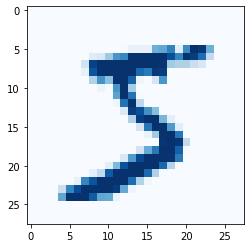

In [59]:
from tensorflow.keras.datasets import mnist   ## mnist 데이터를 불러옴

(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()
# 이 때 불러온 이미지 데이터를 X로, 이 이미지에 0~9까지 붙인 이름표를 Y_class로!!

print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap = 'Blues')   # cmap = 'Greys' : 흑백으로 출력되게 함
plt.show()

In [81]:
import sys

for x in X_train[0]:
    for i in x:
        sys.stdout.write('%3d' % i)
    sys.stdout.write('\n')

# 이렇게 이미지는 다시 숫자의 집합으로 바뀌어 학습셋으로 사용됨
# 28 * 28 = 784 개의 속성을 이용해 (0~9) 10개 클래스 중 하나를 맞히는 문제

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

In [64]:
X_train = X_train.reshape(X_train.shape[0], 784)
X_train

# 주어진 가로 28, 세로 28의 2차원 배열을 784개의 1차원 배열로 바꿔 줘야함

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [65]:
# 0~255 사이의 값으로 이루어진 값을 0~1 사이의 값으로 바꿔야 함
# 바꾸는 방법은 각 값을 255로 나누는 것
# 이렇게 데이터의 폭이 클 때 적절한 값으로 분산의 정도를 바꾸는 과정을 ⭐데이터 정규화⭐ 라고 함

In [66]:
X_train = X_train.astype('float64')   ## 실수형으로 바꿔줘야 나누기 가능
X_train = X_train / 255

X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

In [67]:
print("class : %d" % (Y_class_train[0]))

class : 5


In [68]:
## class => one-hot encoding 해준다 => 0~9까지의 값을 0,1로 이루어지게 바꾸자
## ex) class : 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

In [75]:
Y_train = np_utils.to_categorical(Y_class_train, 10)
Y_test = np_utils.to_categorical(Y_class_test, 10)

In [76]:
print(Y_train[0])    # one-hot encoding이 적용된 것을 확인할 수 있다.

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


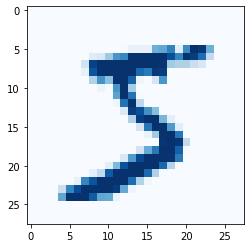

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

In [82]:
# -*- coding : utf-8 -*

from keras.datasets import mnist
from keras.utils import np_utils

import numpy
import sys
import tensorflow as tf

seed = 0
numpy.random.seed(seed)
tf.random.set_seed(seed)

# MNIST 데이터셋 불러오기
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()
# 이 때 불러온 이미지 데이터를 X로, 이 이미지에 0~9까지 붙인 이름표를 Y_class로!!

print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))


# 그래프로 확인
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap = 'Blues')   # cmap = 'Greys' : 흑백으로 출력되게 함
plt.show()


# 코드로 확인
import sys
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%3d' % i)
    sys.stdout.write('\n')

    
# 차원 변환 과정
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255


# 클래스 값 확인
print("class : %d" % (Y_class_train[0]))


# 바이너리화 과정
Y_train = np_utils.to_categorical(Y_class_train, 10)
Y_test = np_utils.to_categorical(Y_class_test, 10)

print(Y_train[0])

In [92]:
model = Sequential()
model.add(Dense(512, input_dim = 784, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',  
             optimizer = 'adam',
             metrics = ['accuracy'])

# 모델 저장 폴더 만들기
import os

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'

# 모델 업데이트 및 저장
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 1,
                              save_best_only = True)   # 앞서 저장한 모델보다 나아졌을 때만 모델 저장 

# 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10)
# 10번 이상 loss가 좋아지지 않으면 중단


history = model.fit(X_train, Y_train, 
                    validation_data = (X_test, Y_test), epochs = 30, batch_size = 200, verbose = 0,
                   callbacks = [early_stopping_callback, checkpointer])
               ## validation = 검증 : 검증 데이터에 test set을 지정한다.
               ## validation_data 를 지정안하면 validation_split 을 지정해주어야 한다!!

print("\n Accuracy : %.4f" % (model.evaluate(X_test, Y_test)[1]))


Epoch 00001: val_loss improved from inf to 0.15533, saving model to ./model\01-0.1553.hdf5

Epoch 00002: val_loss improved from 0.15533 to 0.10623, saving model to ./model\02-0.1062.hdf5

Epoch 00003: val_loss improved from 0.10623 to 0.08204, saving model to ./model\03-0.0820.hdf5

Epoch 00004: val_loss improved from 0.08204 to 0.07681, saving model to ./model\04-0.0768.hdf5

Epoch 00005: val_loss improved from 0.07681 to 0.06882, saving model to ./model\05-0.0688.hdf5

Epoch 00006: val_loss improved from 0.06882 to 0.06567, saving model to ./model\06-0.0657.hdf5

Epoch 00007: val_loss improved from 0.06567 to 0.06195, saving model to ./model\07-0.0620.hdf5

Epoch 00008: val_loss improved from 0.06195 to 0.05934, saving model to ./model\08-0.0593.hdf5

Epoch 00009: val_loss did not improve from 0.05934

Epoch 00010: val_loss did not improve from 0.05934

Epoch 00011: val_loss did not improve from 0.05934

Epoch 00012: val_loss did not improve from 0.05934

Epoch 00013: val_loss did n

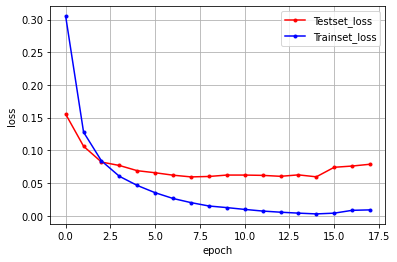

In [95]:
#테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c = 'red', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c = 'blue', label = 'Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc = 'upper right')

# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# ✨ CNN (컨볼루션 신경망) 실행하기 ✨
-> 더 빨리, 더 정확하게 실행하기

In [101]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

In [102]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
from tensorflow.keras.callbacks import EarlyStopping
## 학습이 진행되어도 테스트셋 오차가 줄지 않으면 학습을 멈추게 하는 함수
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [105]:
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(seed)

from tensorflow.keras.datasets import mnist   ## mnist 데이터를 불러옴

(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

# 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

# one-hot encoding 적용
Y_train = np_utils.to_categorical(Y_class_train, 10)
Y_test = np_utils.to_categorical(Y_class_test, 10)

In [109]:
# 컨볼루션 신경망 설정
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), input_shape = (28, 28, 1), activation = 'relu'))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))    # 맥스 풀링 -> 간추림
model.add(Dropout(0.25))   # 학습이 진행 될 때 랜덤하게 은닉층의 노드를 계산하지 않음
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])


# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'

# 모델 업데이트 및 저장
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 1,
                              save_best_only = True)   # 앞서 저장한 모델보다 나아졌을 때만 모델 저장 

# 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10)
# 10번 이상 loss가 좋아지지 않으면 중단


history = model.fit(X_train, Y_train, 
                    validation_data = (X_test, Y_test), epochs = 30, batch_size = 200, verbose = 1,
                   callbacks = [early_stopping_callback, checkpointer])

# model 저장
model.save('./model/my_model_cnn_use.h5')

print("\n Accuracy : %.4f" % (model.evaluate(X_test, Y_test)[1]))

## 정확도가 전보다 훨씬 좋아짐 : 99.3%
## => but, 100%가 아닌 이유 : 데이터 안에 사람의 눈으로도 확인할 수 없는 글씨가 들어있었기 때문

Epoch 1/30
300/300 [==============================] - ETA: 0s - loss: 0.2771 - accuracy: 0.9160
Epoch 00001: val_loss improved from inf to 0.05740, saving model to ./model\01-0.0574.hdf5
300/300 [==============================] - 36s 121ms/step - loss: 0.2771 - accuracy: 0.9160 - val_loss: 0.0574 - val_accuracy: 0.9815
Epoch 2/30
300/300 [==============================] - ETA: 0s - loss: 0.0911 - accuracy: 0.9725
Epoch 00002: val_loss improved from 0.05740 to 0.04747, saving model to ./model\02-0.0475.hdf5
300/300 [==============================] - 37s 123ms/step - loss: 0.0911 - accuracy: 0.9725 - val_loss: 0.0475 - val_accuracy: 0.9833
Epoch 3/30
300/300 [==============================] - ETA: 0s - loss: 0.0689 - accuracy: 0.9797
Epoch 00003: val_loss improved from 0.04747 to 0.03501, saving model to ./model\03-0.0350.hdf5
300/300 [==============================] - 37s 123ms/step - loss: 0.0689 - accuracy: 0.9797 - val_loss: 0.0350 - val_accuracy: 0.9881
Epoch 4/30
300/300 [=========

In [ ]:
#테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c = 'red', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c = 'blue', label = 'Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc = 'upper right')

# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()